# Homework
Merging compact objects produces a chirp signal in the gravitational wave detector. Assume the chirp signal is
y(t)={sin(t2)0<t<150else
 
Please do wavelet transform to show the chirp signal is similar to the one you have seen online. (Notice that the figure online has time as x-axis and frequency as the y-axis) (You are welcome to use any wavelet you prefer.)

<ipython-input-101-ba2136166bc3>:81: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  CS=p.pcolormesh(tauar,sar,(ystau).real)


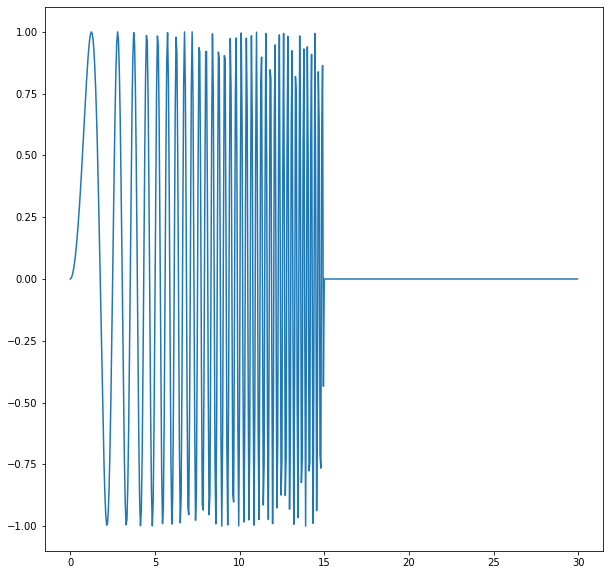

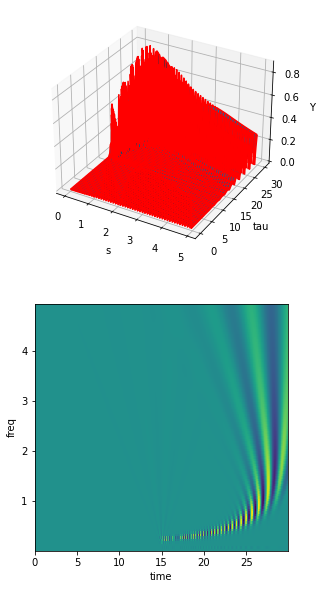

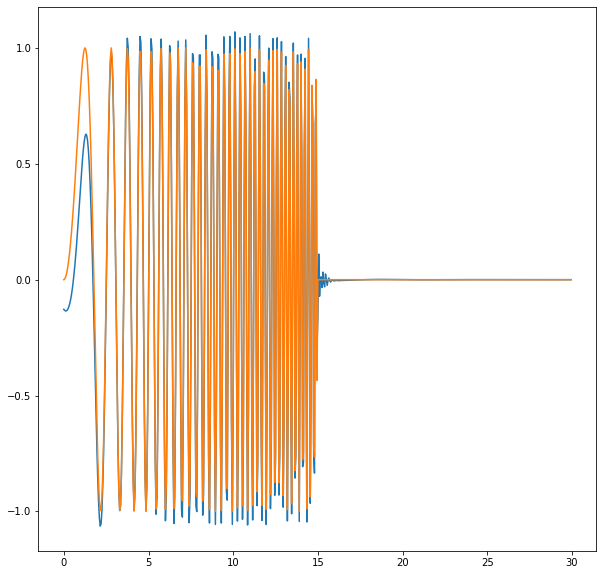

In [101]:
# The same task but only use the imagninary part of the wavelet 

import matplotlib.pyplot as plt
from numpy import *
 
ns=100
ntau=300
dstep=3./ns
sar=arange(0.001,3.001,dstep)
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep)
ystau=zeros((ns, ntau),complex)

nt=600
dtstep=30./nt
tar=arange(0.,30.,dtstep)

def func(t):
    return func2(t)

def func2(t):
    y=0.
    if(0<t and t<15):
        y=sin(t**2)
    else:
        y=0
    return y

def morelet(t,sigma):
    return morletBas(t,sigma)
 
def mexicanHat(t,sigma):
    sig=sigma
    y=(1-t*t/sig/sig)*exp(-t*t/sig/sig/2.)
    return y

def morletBas(t,sigma):
#    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    psi=sin(2.*pi*t)*exp(-t*t/2./sigma/sigma)
    return psi

def gaussian(t,sigma):
    y = exp(-t*t/2.)
    return y

yarr=zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            #ystau[idexs,idextau]=1./sqrt(sar[idexs])*sum(conjugate(morlet((tar-tauar[idextau])/sar[idexs],1.))*yarr)*dtstep
            # I noticed that we are adding points that are tar-tauar
            # I believe this will assign the last point in the array and not the first
            # I made this change and now the plot looks closer to the expected result
            ystau[idexs,-idextau]=1./sqrt(sar[idexs])*sum(conjugate(morlet((tar-tauar[idextau])/sar[idexs],1))*yarr)*dtstep

wavelet()

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p   
#ax = fig.add_subplot(1,1,1,projection='3d')

fig = p.figure()                                    # Create figure
#ax = Axes3D(fig) 
p.plot(tar,yarr)
fig = p.figure()  
ax = fig.add_subplot(2,2,1,projection='3d')
X, Y = p.meshgrid(sar, tauar) 
ax.plot_surface(X, Y, abs(transpose(ystau)))                            # Surface
ax.plot_wireframe(X, Y, abs(transpose(ystau)), color = 'r')               # Add wireframe
ax.set_xlabel('s')
ax.set_ylabel('tau')
ax.set_zlabel('Y')
ax = fig.add_subplot(2,2,3)
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
#CS=p.contour(sar,tauar,transpose(ystau).real, levels=levels)
#CS=p.contour(tauar,sar,(ystau).real, levels=levels)

#Flipped the order of these two
CS=p.pcolormesh(tauar,sar,(ystau).real)
#CS.figure(figsize=(10,10))
p.xlabel('time')
p.ylabel('freq')
p.show()
p.show()  

yarr2=zeros(nt,complex)
def invwavelet(yarr2):     
    for idexs in range(ns):
        for idextau in range(ntau):
            #                                                                                                #Changed this minus sign
            yarr2+=1./sqrt(sar[idexs])/sar[idexs]**2.*morlet((tar-tauar[idextau])/sar[idexs],1.)*ystau[idexs,-idextau]*dstep*dtaustep

invwavelet(yarr2)
p.plot(tar,yarr2.real*2.2)
p.plot(tar,yarr)
p.show()